# T001 · Scaffold-Based data split
Authors:

- Vahid Atabaigielmi, CADD seminar 2023, Volkamer lab, Center for Bioinformatics, Saarland University
- First and last name, year(s) of contribution, lab, institution

## Aim of this talktorial

The aim of this talktorial is to to experiment with different scaffold_based splitting strategies and evaluate the performance of the GCNN model on  test sets to determine the most appropriate splitting approach.

### Contents in *Theory*

_Add Table of Contents (TOC) for Theory section._

* Information leakage
* Molecular scaffold definition
* Data spliting methods
> * Random based spliting
> * Similarity-based Cold-Single Split
> * Identity-based Cold-Single Split
* Model

### Contents in *Practical*

_Add Table of Contents (TOC) for Practical section._
* Import the Data
* Random split
* Similarity-based Cold-Single Split
* Identity-based Cold-Single Split
* Plot trainng and test sets
* Preprocessing data
* Model
* Traning
* Evaluation

### References


* <i>Journal of cheminformatics</i> (2021), <b>13(1)</b>, 1-14 (https://doi.org/10.1186/s13321-021-00576-2)
* <i>pharmacometrics & systems pharmacology</i> (2020), <b>9(3</b>, 129-142 (https://doi.org/10.1002/psp4.12491)
* <i>Journal of medicinal chemistry</i> (1996), <b>39(15)</b>, 2887-2893 (https://doi.org/10.1021/jm9602928)
* <i>Molecular informatics</i> (2011), <b>30(8)</b>, 646-664 (https://doi.org/10.1002/minf.201100078)
* **Talktorial T004** [https://projects.volkamerlab.org/teachopencadd/talktorials/T004_compound_similarity.html]
* **Talktorial T037** [https://github.com/volkamerlab/teachopencadd/blob/master/teachopencadd/talktorials/T037_uncertainty_estimation/talktorial.ipynb]
* dataSAIL Document [https://datasail.readthedocs.io/en/latest/index.html]
* [https://github.com/kalininalab/DataSAIL/blob/main/docs/index.rst]
* ChEMBL web services: [<i>Nucleic Acids Res.</i> (2015), <b>43</b>, 612-620](https://academic.oup.com/nar/article/43/W1/W612/2467881) 

## Theory

### Information leakage
Data leakage is a widespread and critical error that often occurs during the development of machine learning models. The concept of data leakage can be defined in two ways: (i) it happens when information from sources outside the training dataset is utilized to construct the model, or (ii) it occurs when the data used for training a machine learning algorithm coincidentally contains the information being predicted. This leakage of data can have several negative consequences, such as diminishing the model's ability to generalize (overfitting), overestimating the model's performance, or rendering the model entirely invalid. An example of data leakage commonly observed is when data from the test or validation dataset seeps into the training dataset.
To avoid data leakage, it is essential to perform data preparation tasks like normalizing variables, engineering features or clustring the data based on their similarety  dataset before spliting  it into training and test sets. The most straightforward approach for splitting data is a random split, however this is not ideal for structure-activity models. The series effect, also known as the series bias or series-dependent bias, refers to a phenomenon commonly observed in quantitative structure-activity relationship (QSAR) modeling. It arises when the data used for training and testing a QSAR model contain chemical compounds that are structurally similar or part of the same chemical series.

In QSAR modeling, the goal is to establish a relationship between the structural features (descriptors) of chemical compounds and their corresponding activity or property. However, if the data used for training and testing the model primarily consist of compounds from a few closely related chemical series, it can lead to an inflated model performance during cross-validation but poor generalization to compounds from different series in a prospective setting.

The series effect occurs because QSAR models tend to learn and exploit the common structural scaffold patterns within the training data. When the test data contains compounds that are structurally similar to the training compounds, the model may perform well due to the presence of shared descriptors and structural features. However, when the model encounters compounds from different chemical series in real-world applications, it may fail to accurately predict their activities or properties because it hasn't learned the relevant patterns for those series.

To mitigate the series effect and evaluate the generalizability of a QSAR model, it is important to carefully design the training and testing data sets. One suggested method, as mentioned is clustring the data according to their similarities and subsequently dividing the clusters into training and test sets. Nevertheless, this approach carries a disadvantage: it can no longer ensure a expected split ratio between the training and test sets. However recently a package for python has been develpoed to address this probelm. DataSAIL is a tool designed to partition data in a manner that minimizes information leakage. This tool approaches dataset splitting as a constrained minimization problem, where it determines the assignment of data points to different partitions by minimizing an objective function that considers the amount of information leakage.
The aim of this talktorial is to to experiment with different scaffold_based splitting strategies available in Datasail and evaluate the performance of the feed forward neural network model on  test sets to determine the most appropriate splitting approach. DataSAIL utilizes disciplined quasi-convex programming and binary quadratic programs as its framework for expressing the optimization objective. When it comes to solving such problems, Datasail relies on SCIP, a swift non-commercial solver, as well as MOSEK, a commercial solver that offers complimentary licenses for academic purposes.

### Molecular Scaffold definition
A molecular scaffold refers to the core structure of a molecule, which is composed of its ring systems, linkers, and exocyclic double bonds. It is obtained by removing all terminal side chains from the molecule, while retaining any double bonds that exist in the structure.
The concept of a molecular scaffold is particularly relevant in the study of cyclic molecules, where the focus is on the central ring system and its connectivity with other components. By simplifying the structure to its sacffold, researchers can analyze and compare the underlying core structure of different molecules, which can provide insights into their chemical properties and reactivity.
It's important to note that the molecular scaffold does not consider the specific substituents or functional groups attached to the rings or linkers. Instead, it provides a simplified representation of the cyclic structure, highlighting its fundamental connectivity and double bond arrangement.


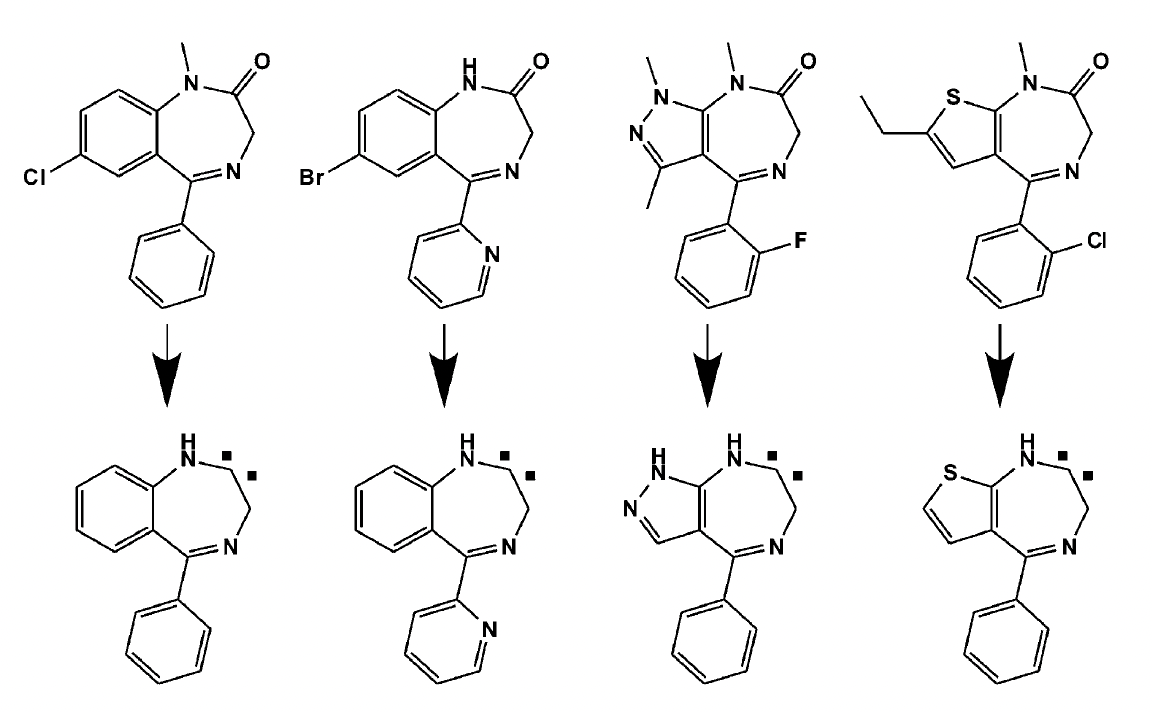

*Figure 1:* 
Murcko Scaffold: [Bemis, G. W., & Murcko, M. A. (1996). The properties of known drugs. 1. Molecular frameworks. Journal of medicinal chemistry, 39(15), 2887-2893.](https://academic.oup.com/nar/article/43/W1/W612/2467881). 

### Datasail's spliting methods


#### Random-based splitting
This is a simple and commonly used method where the data is randomly divided into subsets. The random splitting can be performed in various ways, such as random assignment of samples to different subsets or randomly shuffling the entire dataset and then dividing it into subsets.

#### Similarity-based Cold-Single Split (CCSe)
The process involves dividing a dataset into separate groups or clusters based on the similarity of the data points. This division is done to minimize the sharing of information between the different clusters. The process involves dividing a dataset into separate groups or clusters based on the scaffold similarity of the molecules. This division is done to minimize the sharing of information between the different clusters. The aim is to ensure that the same molecule is not present in more than one cluster 

#### Identity-based Cold-Single Split (ICSe)
The dataset is divided into separate splits based on the IDs assigned to each data point. This approach guarantees that every data point is assigned to exactly one split, avoiding any duplication or omission. This becomes particularly advantageous when combined with the weighting of the data points.

When weights are assigned to the data points, the splits can be optimized to achieve the desired sizes while considering these weights. This optimization process takes into account the relative importance or significance of each data point, as determined by its weight. By incorporating the weights, the splits can be tailored to meet specific requirements regarding the sizes of the resulting subsets while ensuring that the distribution of important data points is appropriately represented in each split.

In summary, splitting the dataset based on data point IDs ensures that every data point appears in only one split, and when combined with weighting, it allows for fine-tuning the splits to meet size requirements while considering the importance of each data point.

### Model
The feed-forward neural network utilized in this tutorial originates from **Talktorial T037**.

## Practical

### Import all the necessary libraries

In [1]:
import numpy as np
import csv
import pandas as pd
from pathlib import Path
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from rdkit import Chem
from rdkit.Chem import AllChem
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tabulate import tabulate

In [2]:
# Set path to this notebook
HERE = Path(_dh[-1])
DATA = HERE / "qm9_100000.tsv"
#DATA = HERE / "EGFR_compounds_lipinski.tsv"



### Dataset (QM9)

In [3]:
data = pd.read_csv('qm9_100000.tsv',sep='\t')
data.head()

,mol_id,smiles,r2
0,gdb_66703,O=C1[C@H]2[C@@H]3[N@H+]2[C@@H]2[C@H]1[C@]32O,882.3655
1,gdb_26191,C[C@@H](O)c1cc(N)c[nH]1,1397.2819
2,gdb_51408,O=CO[C@@H]1[C@@H]2N[C@H]1C2=O,1213.2519
3,gdb_61444,CC(=O)C[C@@H](O)[C@H]1CO1,1448.5037
4,gdb_90638,C[C@H]1N[C@H]2[C@@H]1[C@]2(N)C#N,1226.4068


### Generate fingerprints

In [4]:
smiles = data['smiles'].values
target = data['r2'].values
fingerprints = []
fingerprint_width = 2048
for sm in smiles:
    mol = Chem.MolFromSmiles(sm)
    fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=fingerprint_width)
    fingerprints.append(fingerprint)
data['fingerprints']=fingerprints

### Random split

In [5]:
fingerprints = np.array(fingerprints, dtype=np.float32)

fingerprints_train, fingerprints_test, target_train, target_test = train_test_split(fingerprints, target, test_size=0.2, random_state=42)

fingerprints_train_RAND = torch.from_numpy(np.array(list(fingerprints_train),dtype=np.float32)).float()
fingerprints_test_RAND = torch.from_numpy(np.array(list(fingerprints_test),dtype=np.float32)).float()
target_train_RAND = torch.from_numpy(target_train).float().view(-1, 1)
target_test_RAND = torch.from_numpy(target_test).float().view(-1, 1)


### Similarity-based Cold-Single Split (CCSe)

In [6]:
cluster_CCSe=pd.read_csv('qm9_100000_CCSe_clusters.tsv', sep='\t')
split_CCSe=pd.read_csv('qm9_100000_CCSe_splits.tsv', sep='\t')
cluster_CCSe.rename(columns={'ID': 'mol_id'},inplace=True)

train_CCSe_id=split_CCSe[split_CCSe['Split'].isin(['Split000'])].rename(columns={'ID': 'mol_id'})
test_CCSe_id=split_CCSe[split_CCSe['Split'].isin(['Split001'])].rename(columns={'ID': 'mol_id'})

train_CCSe_t=data[data['mol_id'].isin(train_CCSe_id['mol_id'])]
test_CCSe_t=data[data['mol_id'].isin(test_CCSe_id['mol_id'])]

train_CCSe = pd.merge(train_CCSe_t, cluster_CCSe, on='mol_id')
test_CCSe = pd.merge(test_CCSe_t, cluster_CCSe, on='mol_id')

fingerprints_train_CCSe = torch.from_numpy(np.array(list(train_CCSe['fingerprints']),dtype=np.float32)).float()
fingerprints_test_CCSe = torch.from_numpy(np.array(list(test_CCSe['fingerprints']),dtype=np.float32)).float()
target_train_CCSe = torch.from_numpy(np.array(train_CCSe['r2'])).float().view(-1, 1)
target_test_CCSe = torch.from_numpy(np.array(test_CCSe['r2'])).float().view(-1, 1)

### Identity-based Cold-Single Split (ICSe)

In [7]:
split_ICSe=pd.read_csv('qm9_100000_ICSe_splits.tsv', sep='\t')

In [8]:
train_ICSe_id=split_ICSe[split_ICSe['Split'].isin(['Split000'])].rename(columns={'ID': 'mol_id'})
test_ICSe_id=split_ICSe[split_ICSe['Split'].isin(['Split001'])].rename(columns={'ID': 'mol_id'})

train_ICSe = pd.merge(train_ICSe_id, data, on='mol_id')
test_ICSe = pd.merge(test_ICSe_id, data, on='mol_id')
fingerprints_train_ICSe = torch.from_numpy(np.array(list(train_ICSe['fingerprints']),dtype=np.float32)).float()
fingerprints_test_ICSe = torch.from_numpy(np.array(list(test_ICSe['fingerprints']),dtype=np.float32)).float()
target_train_ICSe = torch.from_numpy(np.array(train_ICSe['r2'])).float().view(-1, 1)
target_test_ICSe = torch.from_numpy(np.array(test_ICSe['r2'])).float().view(-1, 1)

### Feed-forward neural network

In [9]:
class FNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

Initialize a model instance.

In [10]:
model = FNN(fingerprint_width, 128, 1)

### Training

In [11]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

In [12]:
def training_models(fingerprints_train, fingerprints_test, target_train, target_test, split_method):
    global num_epochs
    num_epochs = 15
    batch_size = 32
    train_losses = []
    test_losses = []
    
    for epoch in range(num_epochs):
        indices = torch.randperm(fingerprints_train.size(0))
        fingerprints_train = fingerprints_train[indices]
        target_train = target_train[indices]
        epoch_loss = 0

        for i in range(0, fingerprints_train.size(0), batch_size):
            batch_fingerprints = fingerprints_train[i:i+batch_size]
            batch_target = target_train[i:i+batch_size]

            outputs = model(batch_fingerprints)

            loss = criterion(outputs, batch_target)
            epoch_loss += loss

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        train_losses.append(epoch_loss.item())
        with torch.no_grad():
            model.eval()
            test_outputs = model(fingerprints_test)
            test_loss = criterion(test_outputs, target_test)
            test_losses.append(test_loss.item())
            print(f'Epoch [{epoch+1}/{num_epochs}], Training loss: {epoch_loss.item()}, Test loss: {test_loss.item()}')

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    ax1.plot(train_losses, label='Training loss')
    ax1.set_title(f'{split_method} Training loss over epochs for dataset of size {len(fingerprints_train)+len(fingerprints_test)}')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    
    ax2.plot(test_losses, label='Test loss')
    ax2.set_title(f'{split_method} Test loss over epochs for dataset of size {len(fingerprints_train)+len(fingerprints_test)} ')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    
    plt.tight_layout()
    plt.savefig(f'loss_plot_{split_method}_{len(fingerprints_train)+len(fingerprints_test)}.png')  # Save the figure to a file
    plt.show()

Epoch [1/15], Training loss: 688696128.0, Test loss: 33428.53515625
Epoch [2/15], Training loss: 68254704.0, Test loss: 24782.16796875
Epoch [3/15], Training loss: 57256384.0, Test loss: 22832.330078125
Epoch [4/15], Training loss: 53340984.0, Test loss: 21735.708984375
Epoch [5/15], Training loss: 50662444.0, Test loss: 20882.521484375
Epoch [6/15], Training loss: 48349840.0, Test loss: 20031.19921875
Epoch [7/15], Training loss: 46285904.0, Test loss: 19341.841796875
Epoch [8/15], Training loss: 44466712.0, Test loss: 18751.052734375
Epoch [9/15], Training loss: 42837932.0, Test loss: 18223.46484375
Epoch [10/15], Training loss: 41364960.0, Test loss: 17795.23046875
Epoch [11/15], Training loss: 40101652.0, Test loss: 17423.830078125
Epoch [12/15], Training loss: 38969136.0, Test loss: 17089.837890625
Epoch [13/15], Training loss: 37945184.0, Test loss: 16812.419921875
Epoch [14/15], Training loss: 37011132.0, Test loss: 16564.080078125
Epoch [15/15], Training loss: 36124808.0, Test 

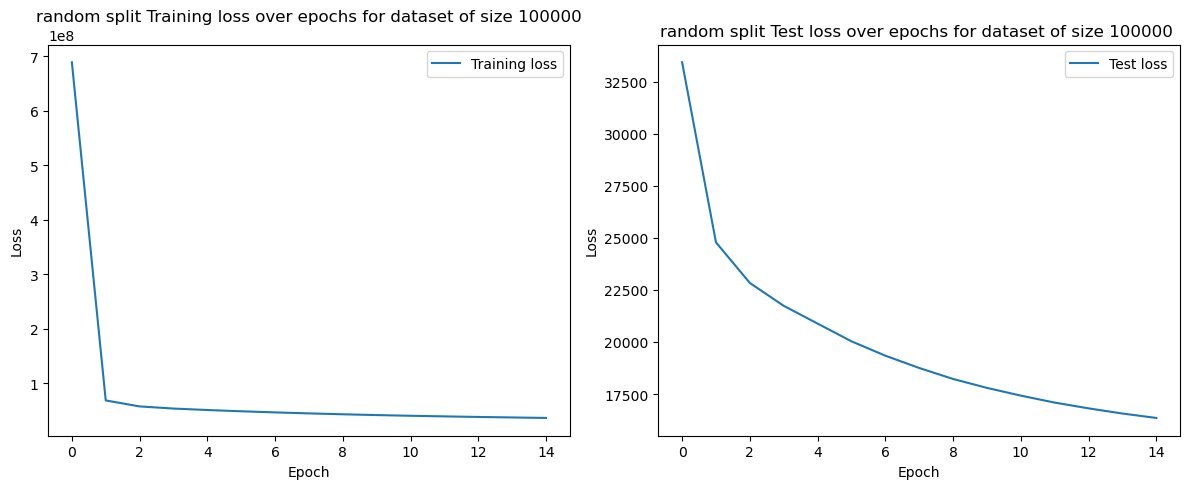

Epoch [1/15], Training loss: 37966784.0, Test loss: 12447.4765625
Epoch [2/15], Training loss: 36739420.0, Test loss: 12810.89453125
Epoch [3/15], Training loss: 35802192.0, Test loss: 12938.435546875
Epoch [4/15], Training loss: 34860648.0, Test loss: 13277.599609375
Epoch [5/15], Training loss: 33949480.0, Test loss: 13387.01953125
Epoch [6/15], Training loss: 33089612.0, Test loss: 13480.5859375
Epoch [7/15], Training loss: 32247188.0, Test loss: 13599.912109375
Epoch [8/15], Training loss: 31410020.0, Test loss: 13720.9345703125
Epoch [9/15], Training loss: 30621462.0, Test loss: 14077.353515625
Epoch [10/15], Training loss: 29844586.0, Test loss: 13978.294921875
Epoch [11/15], Training loss: 29129282.0, Test loss: 14081.4677734375
Epoch [12/15], Training loss: 28390514.0, Test loss: 14286.486328125
Epoch [13/15], Training loss: 27687860.0, Test loss: 14297.7802734375
Epoch [14/15], Training loss: 27036126.0, Test loss: 14412.4228515625
Epoch [15/15], Training loss: 26419578.0, Tes

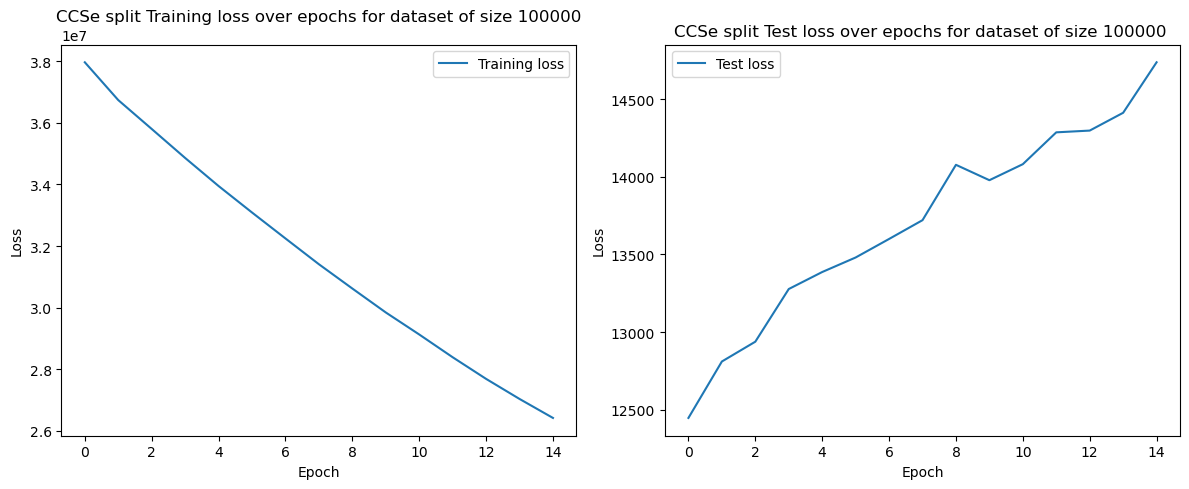

Epoch [1/15], Training loss: 27337168.0, Test loss: 11281.2041015625
Epoch [2/15], Training loss: 26366960.0, Test loss: 11318.9375
Epoch [3/15], Training loss: 25701540.0, Test loss: 11325.75
Epoch [4/15], Training loss: 25066982.0, Test loss: 11406.5849609375
Epoch [5/15], Training loss: 24538834.0, Test loss: 11379.4453125
Epoch [6/15], Training loss: 23981926.0, Test loss: 11408.6015625
Epoch [7/15], Training loss: 23473324.0, Test loss: 11315.703125
Epoch [8/15], Training loss: 22998782.0, Test loss: 11313.046875
Epoch [9/15], Training loss: 22508194.0, Test loss: 11375.837890625
Epoch [10/15], Training loss: 22101780.0, Test loss: 11371.0029296875
Epoch [11/15], Training loss: 21652078.0, Test loss: 11405.6318359375
Epoch [12/15], Training loss: 21264094.0, Test loss: 11480.205078125
Epoch [13/15], Training loss: 20864002.0, Test loss: 11439.9677734375
Epoch [14/15], Training loss: 20485724.0, Test loss: 11511.814453125
Epoch [15/15], Training loss: 20142600.0, Test loss: 11420.9

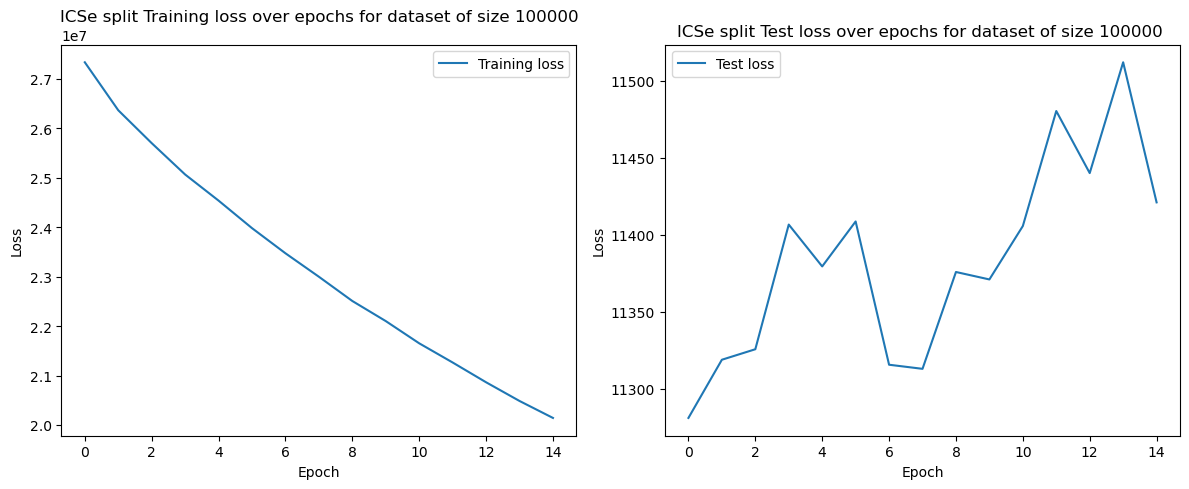

In [13]:
training_models(fingerprints_train_RAND, fingerprints_test_RAND, target_train_RAND, target_test_RAND, 'random split')
training_models(fingerprints_train_CCSe, fingerprints_test_CCSe, target_train_CCSe, target_test_CCSe, 'CCSe split')
training_models(fingerprints_train_ICSe, fingerprints_test_ICSe, target_train_ICSe, target_test_ICSe, 'ICSe split')


## Assess test performance

Table: Evaluation Results for FNN model with 15 epochs over qm9_100000.tsv

╒════════════════╤══════════╤═════════╤═════════════════╕
│ Split method   │      MSE │     MAE │   Test Set Size │
╞════════════════╪══════════╪═════════╪═════════════════╡
│ RAND           │  8656.24 │ 67.5782 │             0.2 │
├────────────────┼──────────┼─────────┼─────────────────┤
│ CCSe           │  8287.65 │ 68.0482 │             0.2 │
├────────────────┼──────────┼─────────┼─────────────────┤
│ ICSe           │ 11421    │ 79.5482 │             0.2 │
╘════════════════╧══════════╧═════════╧═════════════════╛


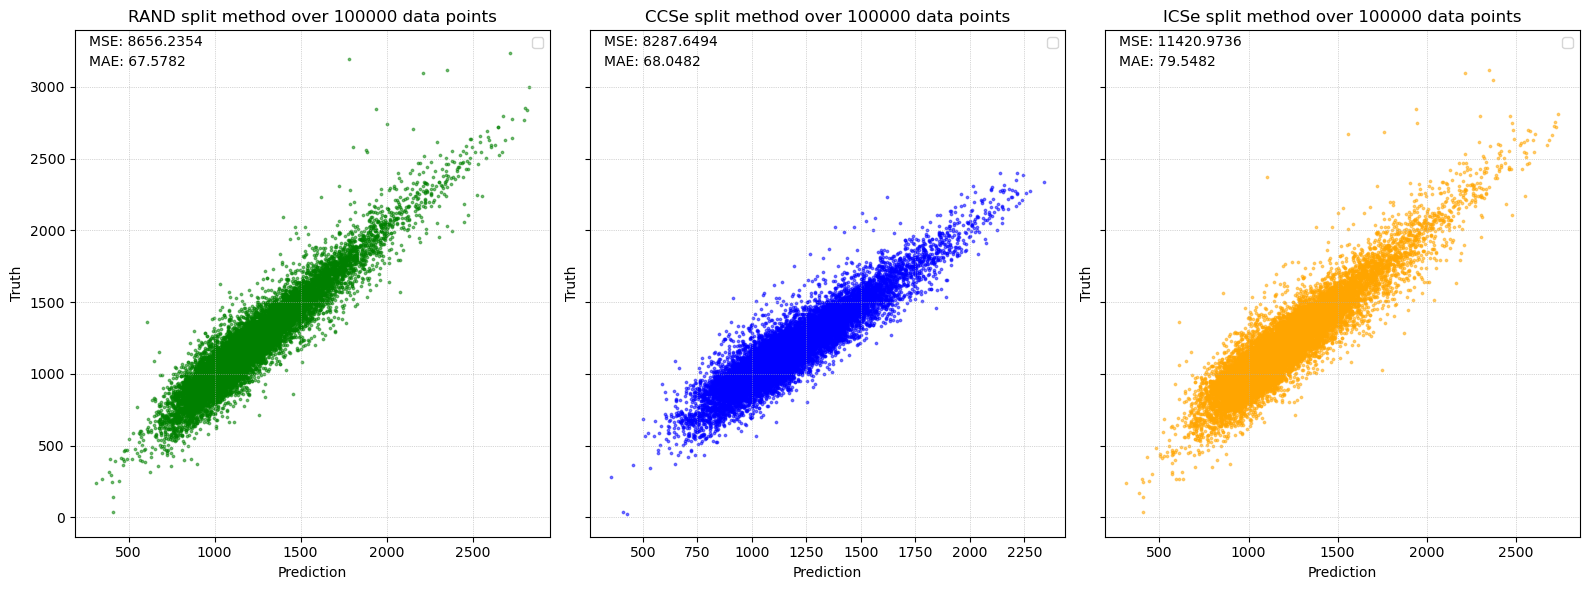

In [14]:
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tabulate import tabulate

def evaluation(fingerprints_test, target_test, title, ax, color, dataset):
    with torch.no_grad():
        model.eval()
        test_outputs = model(fingerprints_test)
        test_loss = criterion(test_outputs, target_test)
    predictions = test_outputs.numpy()

    # Calculate additional evaluation metrics
    mse = mean_squared_error(target_test.flatten(), predictions.flatten())
    mae = mean_absolute_error(target_test.flatten(), predictions.flatten())

    ax.scatter(predictions.flatten(), target_test.flatten(), s=3, alpha=0.5, color=color)
    ax.set_xlabel('Prediction')
    ax.set_ylabel('Truth')
    ax.grid(True, linestyle=':', linewidth=0.5)

    # Display additional evaluation metrics
    ax.text(0.03, 0.97, f'MSE: {mse:.4f}', transform=ax.transAxes)
    ax.text(0.03, 0.93, f'MAE: {mae:.4f}', transform=ax.transAxes)
    ax.set_title(f'{title} split method over {len(dataset)} data points', loc='center')

    # Remove the legend warning
    ax.legend([])

    # Return evaluation metrics as a dictionary
    return {
        'Split method': title,
        'MSE': mse,
        'MAE': mae,
        'Test Set Size': round(len(fingerprints_test) / len(data), 2)
    }

# Control number of plots
fig, axs = plt.subplots(1, 3, figsize=(16, 6), sharey=True)

colors = ['green', 'blue', 'orange', 'red', 'purple', 'brown']

# Call evaluation for each dataset
results = []
results.append(evaluation(fingerprints_test_RAND, target_test_RAND, "RAND", axs[0], colors[0], data))
results.append(evaluation(fingerprints_test_CCSe, target_test_CCSe, "CCSe", axs[1], colors[1], data))
results.append(evaluation(fingerprints_test_ICSe, target_test_ICSe, "ICSe", axs[2], colors[2], data))

# Print results as a table
source_data=str(DATA).split('/')[-1]
table = tabulate(results, headers='keys', tablefmt='fancy_grid')
print(f'Table: Evaluation Results for FNN model with {num_epochs} epochs over {source_data}\n')
print(table)

# Save the table as a text file
with open(f'evaluation_results_FNN{num_epochs}.txt', 'a') as file:
    file.write(f"\n\nTable: Evaluation Results for FNN model with {num_epochs} epochs over {source_data}\n")
    file.write(table)

with open(f'evaluation_results_FNN{num_epochs}.tsv', 'a', newline='') as file:
    writer = csv.writer(file, delimiter='\t')
    writer.writerow(['Split method', 'MSE', 'MAE', 'dataset Size'])
    for result in results:
        writer.writerow([result['Split method'], result['MSE'], result['MAE'],len(data)])

# Save the plots
for result, ax in zip(results, axs):
    title = result['Split method']
    plt.savefig(f'results_{len(data)}.png')

# Display the plots
plt.tight_layout()
plt.show()


### Plot MSE and MAE vs dataset size

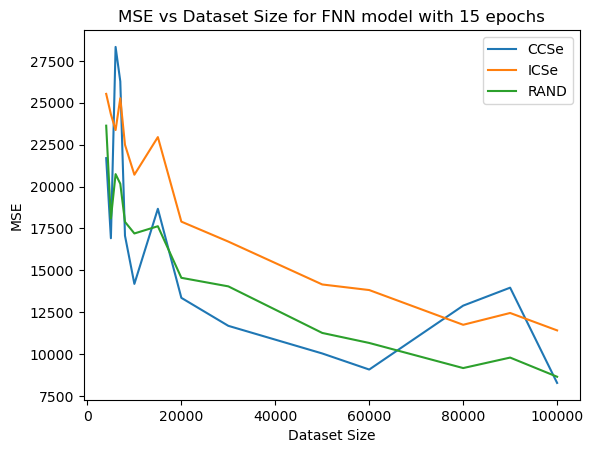

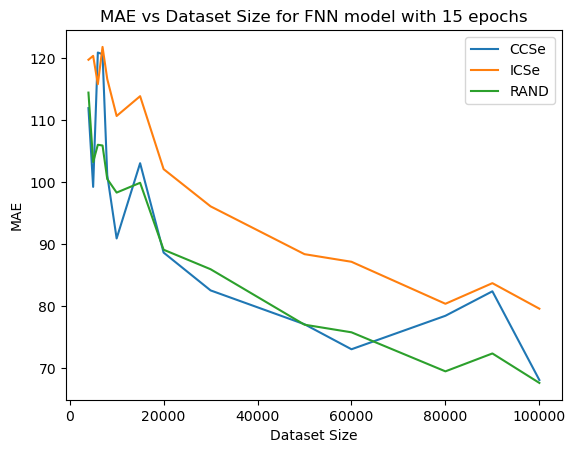

In [17]:
#data=pd.read_csv('evaluation_results_FNN15.tsv',sep='\t',).drop('Unnamed: 0', axis=1)
#data=data[~data['Split method'].str.contains('Split')]
#data.to_csv('evaluation_results_FNN15.tsv',sep='\t',index=False)

# Read the TSV file
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('evaluation_results_FNN15.tsv', delimiter='\t')

# Group the data by the method
grouped_data = data.groupby('Split method')

# Plotting MSE
fig, ax = plt.subplots()

# Iterate over each group and plot the MSE data
for name, group in grouped_data:
    ax.plot(group['dataset Size'], group['MSE'], label=name)

# Set labels and title for MSE plot
ax.set_xlabel('Dataset Size')
ax.set_ylabel('MSE')
ax.set_title(f'MSE vs Dataset Size for FNN model with {num_epochs} epochs')

# Add legend for MSE plot
ax.legend()

# Save the MSE plot as PNG
plt.savefig('mse_plot.png')

# Show the MSE plot
plt.show()

# Plotting MAE
fig, ax = plt.subplots()

# Iterate over each group and plot the MAE data
for name, group in grouped_data:
    ax.plot(group['dataset Size'], group['MAE'], label=name)

# Set labels and title for MAE plot
ax.set_xlabel('Dataset Size')
ax.set_ylabel('MAE')
ax.set_title(f'MAE vs Dataset Size for FNN model with {num_epochs} epochs')

# Add legend for MAE plot
ax.legend()

# Save the MAE plot as PNG
#plt.savefig('mae_plot.png')

# Show the MAE plot
#plt.show()

